In [3]:
# automatically reload imported modules
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import sys
import matplotlib
from matplotlib import pyplot as plt
import pylab as pl

from filters import GrayscaleNormalizer

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


FOLDER_PATH = 'C:\\Users\\Dominic\\Desktop\\Academics\\Term 7\\Computer Vision\\dump\\Concrete Crack Images for Classification'
SUTD_PATH = 'C:\\Users\\Dominic\\Desktop\\Academics\\Term 7\\Computer Vision\\dump\\SUTD Cracks\\'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
imgs = []
normalize_grayscale = GrayscaleNormalizer()

img = cv2.imread(FOLDER_PATH + '/Positive/00001.jpg', 0).astype(np.float32)
imgs.append(img)

img = cv2.imread(SUTD_PATH + '/Positive/00001.jpg', 0).astype(np.float32)
imgs.append(img)

img = cv2.imread(SUTD_PATH + '/Positive/00101.jpg', 0).astype(np.float32)
imgs.append(img)

In [9]:
from filters import *
import preprocessing.shadow_reduction

filters = {}

grayscale       = GrayscaleNormalizer()
bilateral_canny = BilateralCanny()
kernel = np.ones((5,5),np.uint8)

# filters['no filter']       = lambda x : x
# filters['canny']           = bilateral_canny.canny_img
filters['bilateral canny'] = bilateral_canny.bilateral_canny_img
filters['canny gradient']  = canny_gradient

filters['otsu']            = otsu
filters['tophat']          = tophat
filters['blackhat']        = blackhat
# filters['gradient']        = gradient
# filters['gradient2']       = gradient2
# filters['gradient3']       = gradient3

filters['guass blur']       = lambda x : cv2.GaussianBlur(x,(5,5),0)
# filters['bilateral filter'] = lambda x : cv2.bilateralFilter(x.astype(np.uint8),9,75,75)
# filters['blur']             = lambda x : cv2.blur(x,(5,5))
filters['grayscale']        = grayscale
filters['adaptive']         = lambda x : cv2.adaptiveThreshold(x.astype(np.uint8),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
#                                                               
# filters['close5x5']        = lambda x : cv2.morphologyEx(x, cv2.MORPH_CLOSE, kernel)
# filters['open5x5']         = lambda x : cv2.morphologyEx(x, cv2.MORPH_OPEN, kernel)
# filters['dilate5x5']       = lambda x : cv2.dilate(x, kernel, iterations = 1)
# filters['erode5x5']        = lambda x : cv2.erode(x, kernel, iterations = 1)
# filters['gradient5x5']     = lambda x : cv2.morphologyEx(x, cv2.MORPH_GRADIENT, kernel)
# filters['tophat5x5']       = lambda x : cv2.morphologyEx(x, cv2.MORPH_BLACKHAT, kernel)
# filters['blackhat5x5']     = lambda x : cv2.morphologyEx(x, cv2.MORPH_TOPHAT, kernel)

# filters['thres_bin127']          = lambda x : cv2.threshold(x,127,255,cv2.THRESH_BINARY)[1]
# filters['thres_bininv127']       = lambda x : cv2.threshold(x,127,255,cv2.THRESH_BINARY_INV)[1]
# filters['thres_bintrunc127']     = lambda x : cv2.threshold(x,127,255,cv2.THRESH_TRUNC)[1]
# filters['thres_bintozero127']    = lambda x : cv2.threshold(x,127,255,cv2.THRESH_TOZERO)[1]
# filters['thres_bintozeroinv127'] = lambda x : cv2.threshold(x,127,255,cv2.THRESH_TOZERO_INV)[1]

# best_filters = {}

# best_filters['best_1']     = lambda x : filters['gradient5x5'](filters['adaptive'](filters['blur'](x)))
# best_filters['best_2']     = lambda x : filters['erode5x5'](filters['gradient'](filters['adaptive'](x)))
# best_filters['best_3']     = lambda x : np.abs(filters['dilate5x5'](filters['guass blur'](filters['blur'](x))) - 255)
# best_filters['best_4']     = lambda x : np.abs(filters['open5x5'](filters['adaptive'](filters['blur'](x))) - 255)
# best_filters['best_5']     = lambda x : np.abs(filters['adaptive'](filters['thres_bin127'](filters['grayscale'](x))) - 255)
# best_filters['best_6']     = lambda x : np.abs(filters['adaptive'](filters['dilate5x5'](filters['bilateral filter'](x))) - 255)
# best_filters['best_7']     = lambda x : np.abs(filters['adaptive'](filters['dilate5x5'](filters['blur'](x))) - 255)
# best_filters['best_8']     = lambda x : np.abs(filters['adaptive'](filters['gradient'](filters['blur'](x))) - 255)
# best_filters['best_10']    = lambda x : np.abs(filters['bilateral filter'](filters['adaptive'](filters['dilate5x5'](x))) - 255)
# best_filters['best_11']    = lambda x : np.abs(filters['bilateral filter'](filters['adaptive'](filters['blur'](x))) - 255)
# best_filters['best_12']    = lambda x : np.abs(filters['guass blur'](filters['adaptive'](filters['blur'](x))) - 255) 
# best_filters['best_13']    = lambda x : filters['gradient'](filters['thres_bin127'](filters['grayscale'](x)))

filters_m2 = {}

for f1_name, f1_func in filters.items():
    for f2_name, f2_func in filters.items():
        def combination_func():
            a = f1_func
            b = f2_func
            return lambda x : a(b(x))

        filters_m2["{0}\n{1}".format(f1_name, f2_name)] = combination_func()
            
# bob = [ (1, 5), (1, 6), (1, 13), (3, 5), (3, 6), (6, 3), (6, 6), (6, 7) ]

# for f1_name, f1_func in best_filters.items():
#     for f2_name, f2_func in best_filters.items():
        
#         if (int(f1_name.replace("best_", "")), int(f2_name.replace("best_", ""))) in bob:
#             def combination_func():
#                 a = f1_func
#                 b = f2_func
#                 return lambda x : a(x) * b(x)

#             filters_m2["{0}\n{1}".format(f1_name, f2_name)] = combination_func()

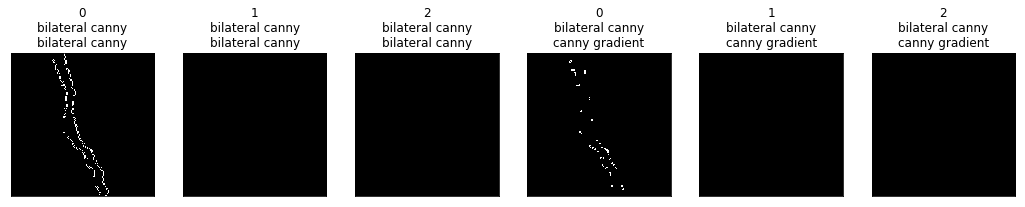

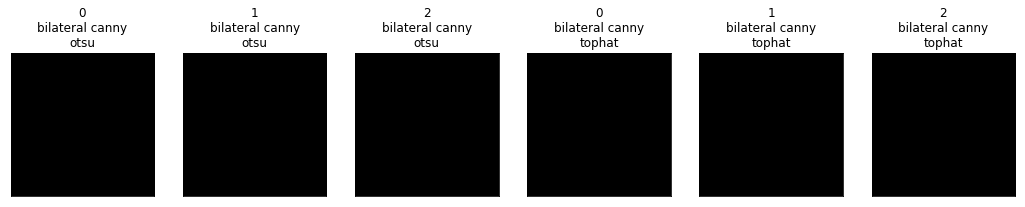

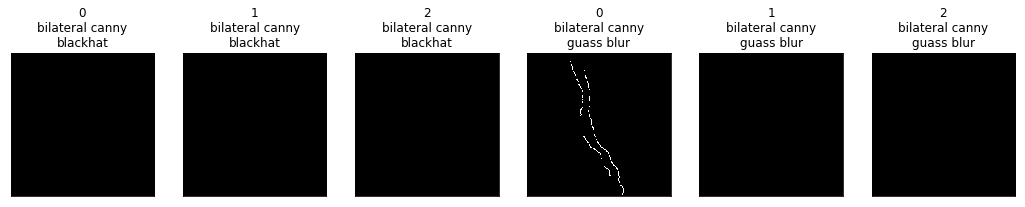

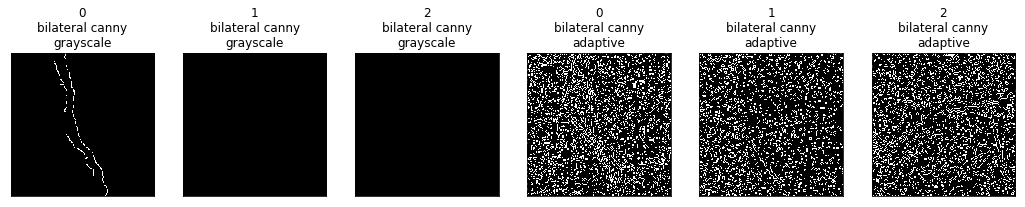

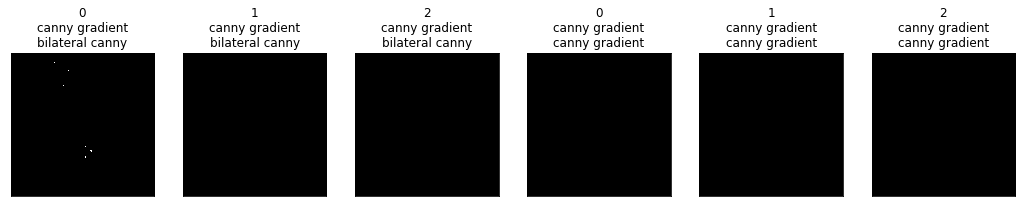

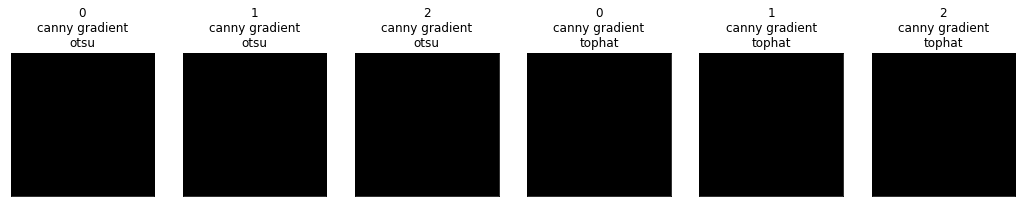

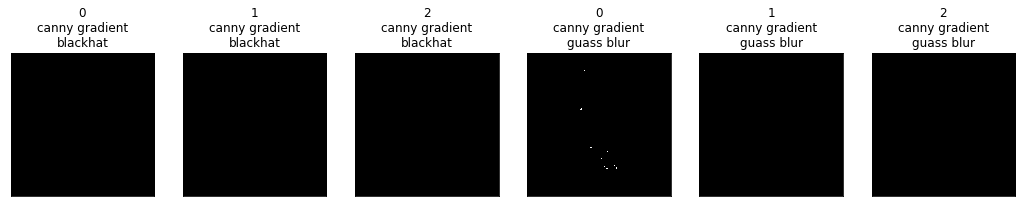

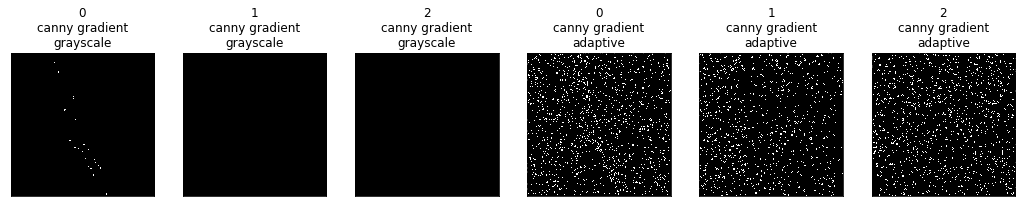

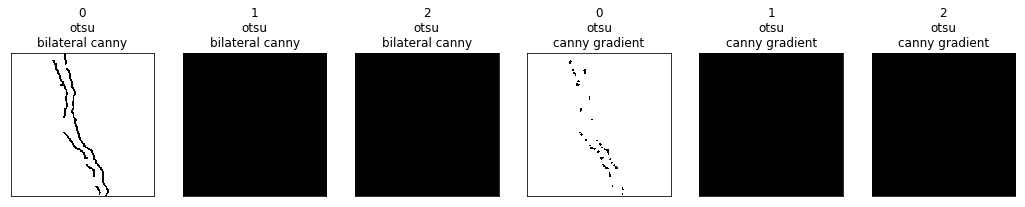

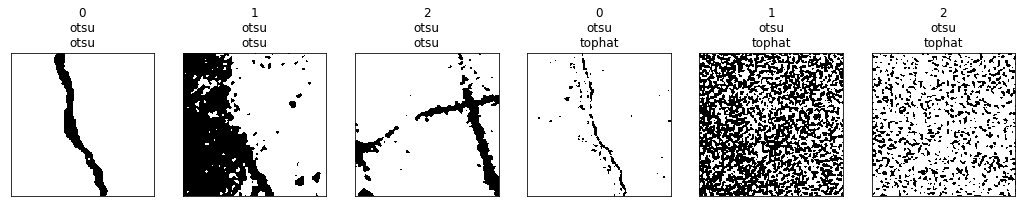

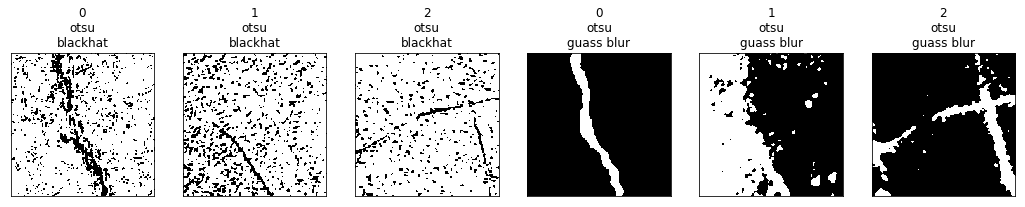

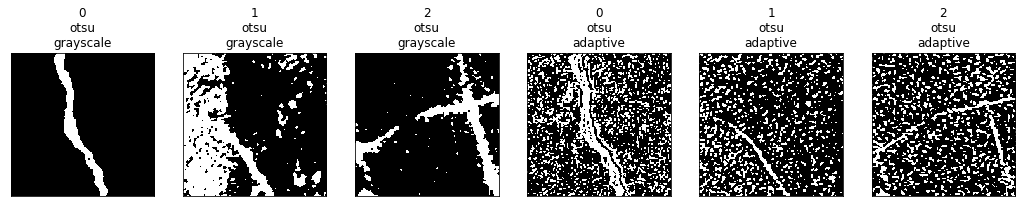

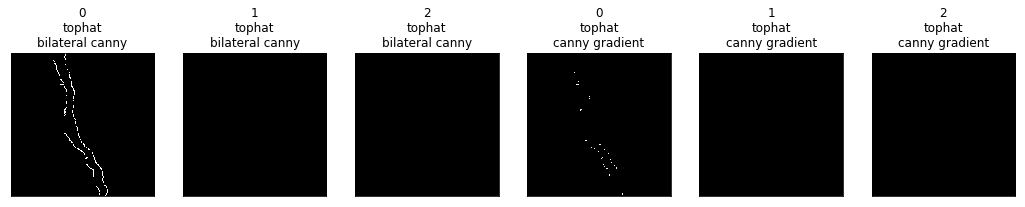

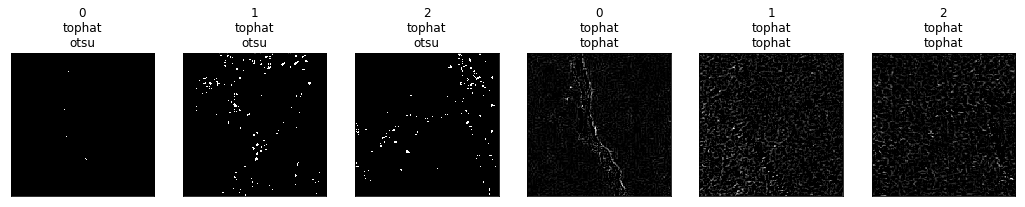

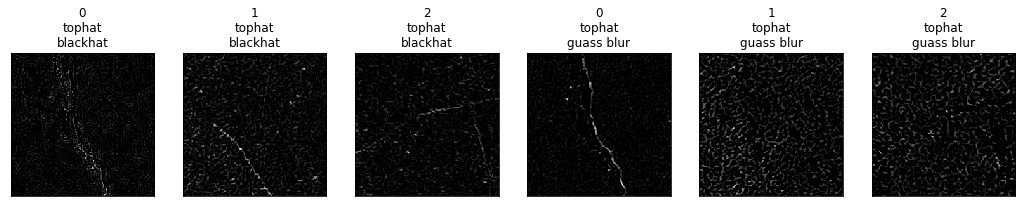

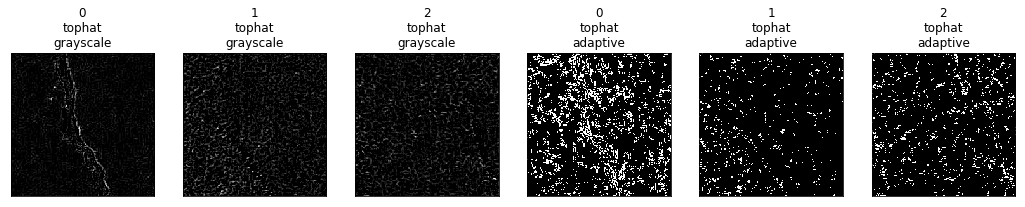

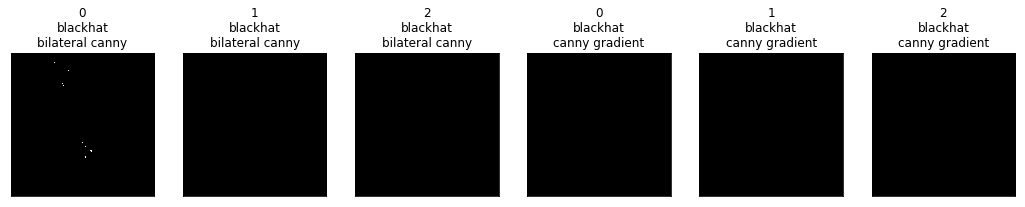

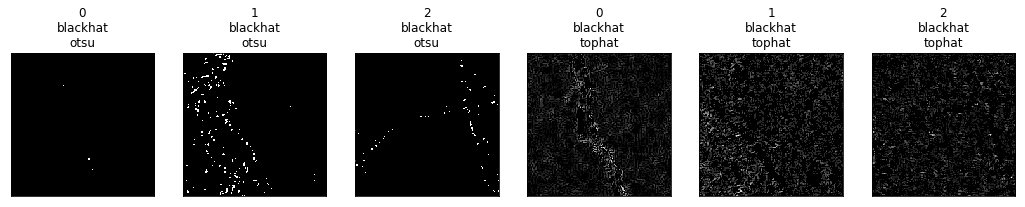

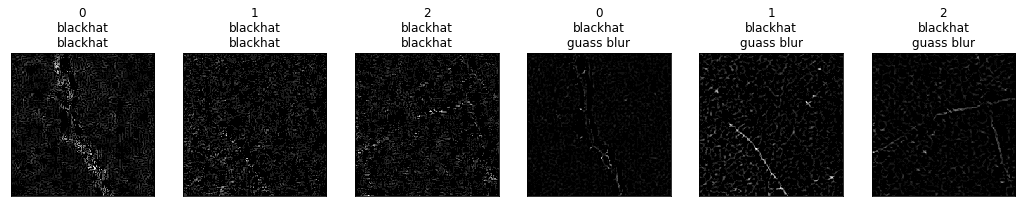

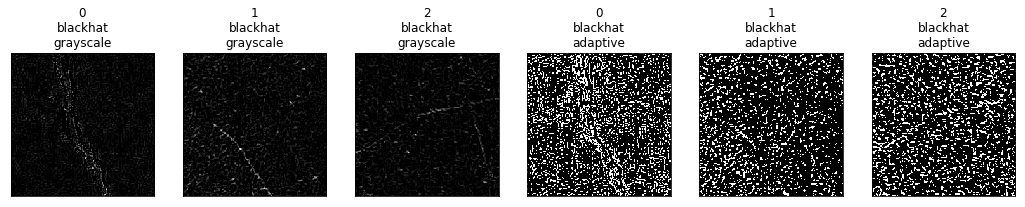

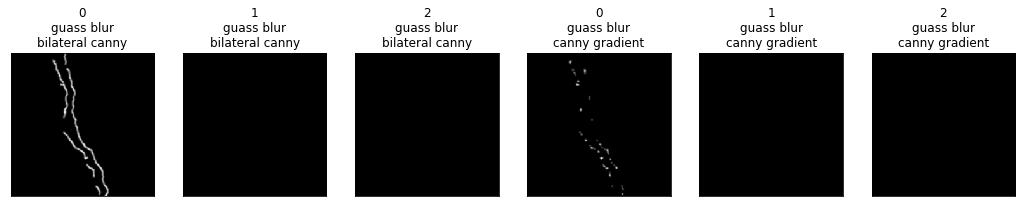

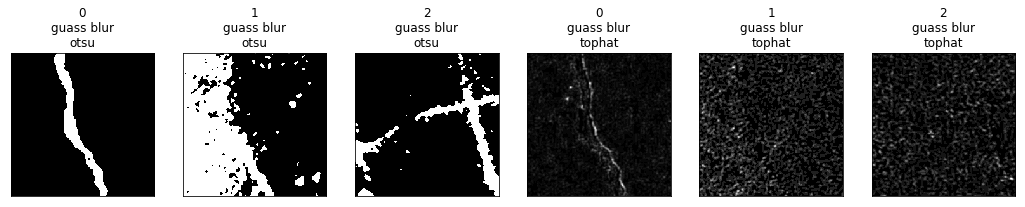

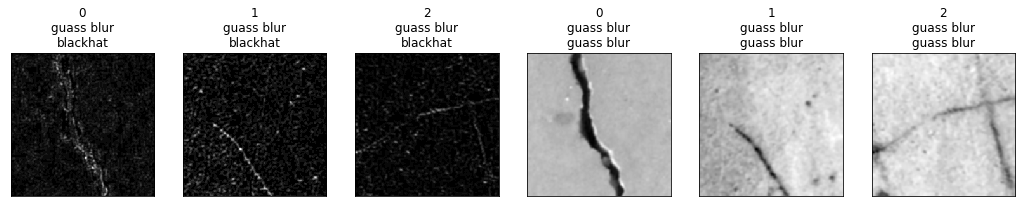

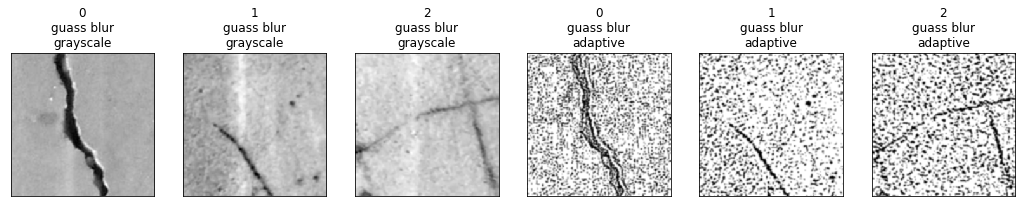

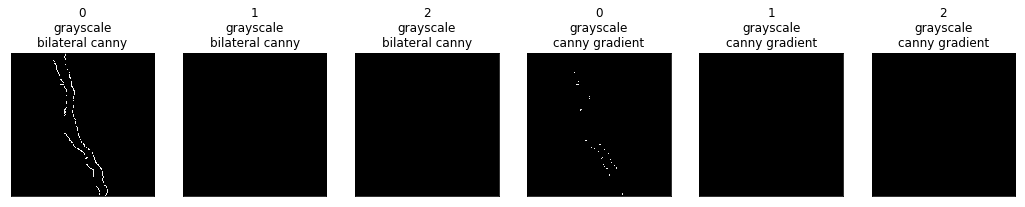

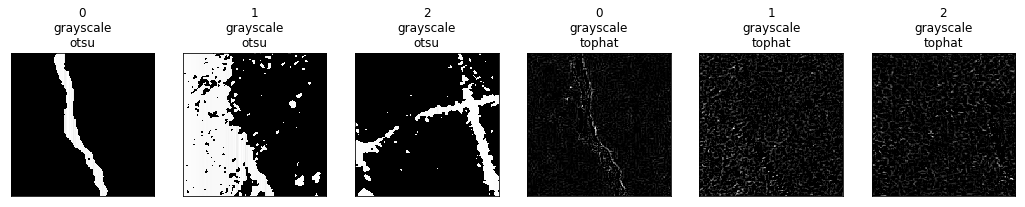

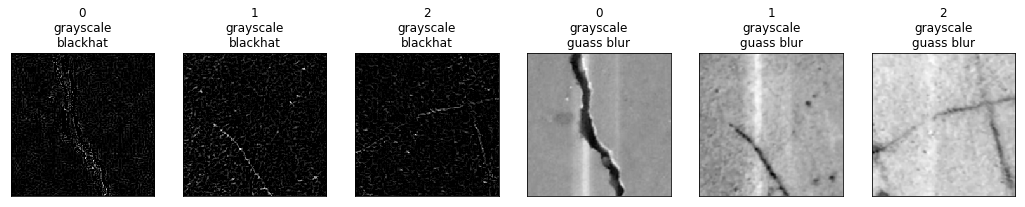

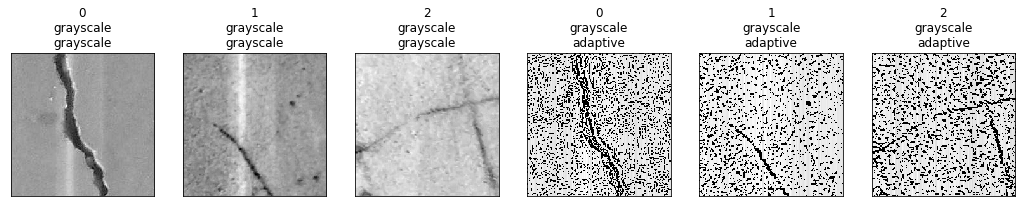

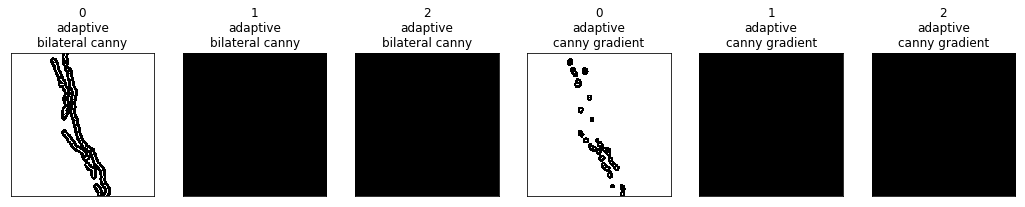

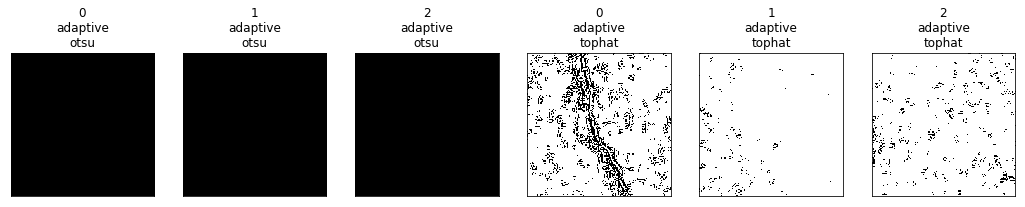

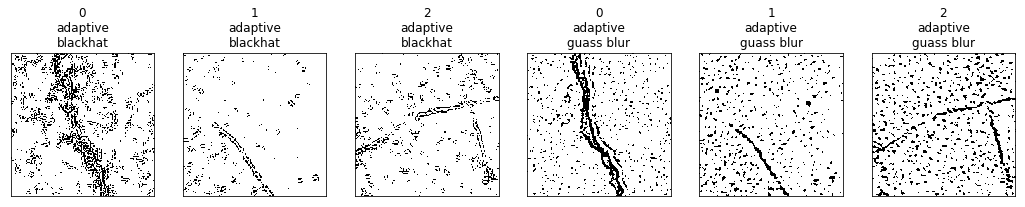

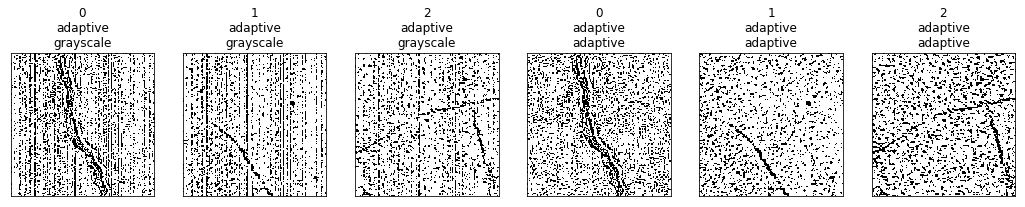

In [10]:
fig_size = (18, 9)

r = len(filters)//6+1
plt.figure(figsize=fig_size)

test_filters = filters_m2

i = 0
for filter_name, filter_func in test_filters.items():
    
    for idx in range(len(imgs)):
        img = filter_func(imgs[idx])
    
        plt.subplot(1, 6, i % 6 + 1), plt.imshow(img, cmap='gray')
        plt.title("{0}\n{1}".format(idx, filter_name)),plt.xticks([]),plt.yticks([])

        i += 1

        if i % 6 == 0:
            plt.show()
            plt.figure(figsize=fig_size)

if i % 6 != 0:
    plt.show()